In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
## The Problem utilises 3 parts, thus n = 3
## We need to create 3 local stiffness matrices and stack them into a Global Stiffness matrix.
def create_stiffness(E,I,L):
    k = E*I/(L**3)
    
    K = k*np.array(([12,6*L,-12,6*L,6*L,4*L*L,-6*L,2*L*L,-12,-6*L,12,-6*L,6*L,2*L*L,-6*L,4*L*L]))
    K = K.reshape(4,4)
    return K
    

def global_stiffness(n,set_E,set_I,set_L):
    mat = np.zeros((2*n+2,2*n+2))
    
    for i in range(n):
        start = 2*i
        end = 2*i + 4
        
        #print(start,end)
        E,I,L = set_E[i],set_I[i],set_L[i]
        
        mat[start:end,start:end] += create_stiffness(E, I, L)
    
    return mat

def FEM(n,set_E,set_I,set_L,F):
    '''
    In the FEM Method we have 2 unknown forces, and the rest known for a cantilever.
    For Deflections, the corresponding deflections are known to be 0.
    Thus we can consider the m-2,m-2 matrix and invert it with the F vector to get
    the unknown displacements which we require.
    We are also returning The forces at the cantilever clamp.
    '''
    
    known_load_vec = np.array((0,0,0,0,F,0,0,0)).reshape(8,1)
    G = global_stiffness(n, set_E, set_I, set_L)
    #print(np.shape(G))
    G2 = G[2:10,2:10]
    G_I = np.linalg.inv(G2)
    
    deflections = G_I@known_load_vec
    
    total_def = np.vstack((np.array((0,0)).reshape(2,1),deflections))
    #print(total_def)
    
    f1y = G[0]@total_def
    m1z = G[1]@total_def
    
    return total_def


In [7]:
balloon_expansion = 25 # Found experimenatally
limiting_val = min(100*np.sin(45),balloon_expansion)
# Limiting Value is by using balloon as 2*pi*r*r and then taking inflation as r.
set_I = [2.6666e4,2.6666e4,2.6666e4,2.6666e4]
set_E = [1.32,0.3,1.32,1.32]
set_L = [10,60,25,25]
    
def1 = []
def2 = []
def3 = []
def4 = []
f = []

for t in range(1,50,1):
    r = t*0.1
    deflection = FEM(4,set_E,set_I,set_L,r)
    
    f.append(r)
    def1.append(deflection[2])
    def2.append(deflection[4])
    def3.append(deflection[6])
    def4.append(deflection[8])
    k = (np.argmax(deflection))

    if max(deflection[2],deflection[4],deflection[6],deflection[8]) >= limiting_val:
        print('Max force that can be applied is',r,'Newtons')
        break
    
    #print(np.argmax(deflection))
    
#f = range(1,20,1)

Max force that can be applied is 0.7000000000000001 Newtons


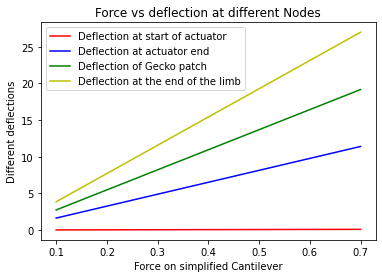

In [8]:
plt.title('Force vs deflection at different Nodes')

plt.plot(f,def1,c = 'r',label = 'Deflection at start of actuator')
plt.plot(f,def2,c = 'b',label = 'Deflection at actuator end')
plt.plot(f,def3,c = 'g',label = 'Deflection of Gecko patch ')
plt.plot(f,def4,c = 'y',label = 'Deflection at the end of the limb')
plt.xlabel('Force on simplified Cantilever')
plt.ylabel('Different deflections')
plt.legend()
plt.show()

In [22]:
Nodes = [(1,2),(2,3),(3,4),(4,5)]
Elements = ['PDMS Strip','Actuator','Gecko Patch','End offset']
table = pd.DataFrame({'Element':Elements,'Nodes':Nodes,'Lengths (mm)':set_L,'Young\'s Modulus (MPa)':set_E ,'Moment of Interia of Element(mm^4)':set_I})


In [23]:
table

,Element,Nodes,Lengths (mm),Young's Modulus (MPa),Moment of Interia of Element(mm^4)
0,PDMS Strip,"(1, 2)",10,1.32,26666.0
1,Actuator,"(2, 3)",60,0.30,26666.0
2,Gecko Patch,"(3, 4)",25,1.32,26666.0
3,End offset,"(4, 5)",25,1.32,26666.0
